**The Concept**

Linear regression attempts to model the relation of dependent and independent variables by fitting a linear equation. 

Suppose we have the data of quiz scores and the length of study hours of 100 students as shown here:

![alt text](https://miro.medium.com/max/691/1*fDfhpbBM67W-wPsyfX886g.png)

By visually inspecting the scatter plot, we can easily draw a line with the equation *y=mx+b* , where "m" and "b" are the slope and y-intercept, respectively. These can be seen on the figure as roughly 40 and 0 for m and b respectively.

Let’s draw a line where m=40 and b=0.

![alt text](https://miro.medium.com/max/696/1*J0dPncPRUdNQxgs7TgL60g.png)

The *y=40x* line looks good! 

We can then estimate that a student’s score is just 40 multiplied by the number of hours a student studied.

Linear regression works exactly like this except that it cannot visually check the slope and y-intercept from the scatter plot. What it does instead is to guess the slope and y-intercept first, then measure how good its guess is. If it’s not good enough then it adjusts the slope and y-intercept until the line fits the data well.

Linear regression is a three-step algorithm:

1.   Initialize the parameters of a linear equation (first guess of slope and y-intercept).
2.   Measure the goodness of fit based on some function.
1.   Adjust the parameters until the measure in step 2 looks good.



**1.** **Linear Equation and Initialization**

Now that we built our intuition around linear regression, let’s talk about each of the step mathematically.

The first step in linear regression model is to initialize a linear equation; yes, we’ll use y=mx+b but we have to generalize our approach. 
The reason for such is that we might be facing data with multiple independent variables. 

Think of it as adding another variable in our Quiz Score data such as the amount of coffee consumed while studying. Having this coffee dimension will make the linear equation look like this: *y = m1x1 + m2x2 + b* , where m1 and m2 are slopes for the study hours and coffee dimensions respectively, and x1 and x2 are the study hours and coffee variables.


We’ll use dot product to represent the product of matrices, m and x, instead of writing a longer equation for every new variable. Note that it is also valid to use the term tensor since it is the generalization of a matrix. The linear equation should be written as **y = m⋅x + b**.

There are many ways to initialize the parameters of the equation, the most common ones are using random values, zeros, or ones. You are free to use any type of initialization, this choice will determine how fast your learning algorithm terminates. In the next iteration of the algorithm, these parameters will be updated based on some function that we'll discuss in step 2.


**2. Loss Function**

Now let’s say the initial values you set for m and b are ones, so your equation is `y = 1x + 1` .

The initial predictions will look like the orange dots in the figure below. It’s obviously a very bad prediction, we need a number to quantify how bad or good these predictions are.

![alt text](https://miro.medium.com/max/691/1*X-1q5DK6xYxBrWxNjTdelA.png)

There are many ways to measure the goodness of our prediction, we’ll use one of them called mean squared error (MSE). In this context, error means difference, so MSE literally means taking the square of the difference between actual and predicted values, then take the average. It is written mathematically as:

![alt text](https://miro.medium.com/max/591/0*L2cG_FchQ00t06yk.png)

Functions like MSE are called loss function or objective function. These are functions that the algorithm wants to minimize. 

If our linear regression model perfectly predicts the quiz scores, its MSE will be equal to 0. So in every iteration of the algorithm, it should update the parameters such that the MSE comes closer to 0 without overfitting. 

**3. Gradient Descent**

Sure we can keep on guessing the parameters until we get close enough to zero MSE but it will take time and effort — gradient descent will do this for us. 

Gradient descent is one of the building blocks of artificial intelligence. Algorithms like gradient descent allows learning algorithms to learn without being told so explicitly. 

Gradient descent is an optimization algorithm that we will use to minimize our loss function (MSE in this case). It does so by updating the parameters with small changes in each iteration, this change can be big too depending on your preference (learning rate).

In each new iteration, the updated parameters will be

 `p_new = p_old - (l*dL/dp)`

where p is the parameter which could be the slope m, or the y-intercept b. 

The new variables, l and dL/dp, are the learning rate and partial derivative of the loss function with respect to the parameter.

With enough iterations, the slope and y-intercept will get closer to 40 and 0, the values we consider to be “close enough” to fit to our data. As you may have observed, if you happen to initialize the parameters close to 40 and 0, say 35 and 0.5, then the algorithm will take less iterations.

**Stopping Criteria**

Here are some of the possible ways to terminate the algorithm:


1.   Terminate the algorithm once a specified number of iterations is satisfied.
2.   Terminate the algorithm once a specified MSE is satisfied.
1.   Terminate the algorithm if the MSE does not improve in the next iteration. You can specify a precision such as 0.001, if the difference between two successive MSEs is less than this precision, then stop the algorithm.


The following code demo will walk you through how to implement linear regression from scratch using only Tensorflow.

Here, we’ll follow the three-step approach to linear regression algorithm discussed above and terminate the algorithm using stopping criteria 1.

**Import libraries**

These are the only libraries we’ll need for this demo - TensorFlow for building the algorithm, pyplot for visualization purposes, and boston_housing as our toy dataset.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

**1. Initialize a linear equation**

Let’s start off by creating a SimpleLinearRegression class with initialization options.

In [2]:
class SimpleLinearRegression:
    def __init__(self, initializer='random'):
        if initializer=='ones':
            self.var = 1.
        elif initializer=='zeros':
            self.var = 0.
        elif initializer=='random':
            self.var = tf.random.uniform(shape=[], minval=0., maxval=1.)
            
        self.m = tf.Variable(1., shape=tf.TensorShape(None))
        self.b = tf.Variable(self.var)

Here the class is specified with three initialization options - ones, zeros, and random (default). 

`tf.random.uniform` will generate a tensor with random values from uniform distribution within the range `minval` and `maxval` with shape `shape`. 

We've defined m as a variable with no particular shape so it can be flexible enough to accept any number of independent variables, this can be done by setting `shape = tf.TensorShape(None)`.

**2. Loss Function**

Next is to implement our loss function, MSE. Following is the implementation of the function in TensorFlow:

In [3]:
def mse(self, true, predicted):
        return tf.reduce_mean(tf.square(true-predicted))

This is fairly easy to write in Tensorflow. 

First you take the difference of `true and predicted value`, use `tf.square` to square the differences then get the mean of the squared differences using `tf.reduce_mean` .

This function accepts true and predicted values where the former comes from the data itself, but the latter have to be computed.

In [4]:
def predict(self, x):
        return tf.reduce_sum(self.m * x, 1) + self.b

The predict method is done by simplifying the linear equation. 

First we take the dot product of `m (slope tensor)` and `x (feature tensor)` and add the `y-intercept b`. 

We have to specify the axis to which the reduction in `reduction_sum` will be computed to 1 , otherwise it will reduce the tensor to a single sum.

**3. Updating the parameters**


In [5]:
def update(self, X, y, learning_rate):
        with tf.GradientTape(persistent=True) as g:
            loss = self.mse(y, self.predict(X))
            
        print("Loss: ", loss)

        dy_dm = g.gradient(loss, self.m)
        dy_db = g.gradient(loss, self.b)
        
        self.m.assign_sub(learning_rate * dy_dm)
        self.b.assign_sub(learning_rate * dy_db)

We need gradient descent to update our parameters for every iteration. 

There’s no need to create this algorithm from scratch as Tensorflow has a built in function for this `tf.GradientTape`. By default, GradientTape has persistent set to False which means at most one call can be made to the gradient() method in this object.

Since we are using this to calculate for two gradients (one for m and another for b ) for every iteration, we have to set this to True. Then we specify the loss function to which gradients will be computed, in this case mse with parameters `y and self.predict(X)` which represents true and predicted values respectively.

Each parameter will be updated by subtracting the product of learning rate and the gradient of the parameter.

`p_new = p_old - (l*dL/dp)`

Learning is a hyperparameter and should be specified when training the linear regressor. The gradient, `dL/dp`, is computed using the gradient() method, which accepts the loss function and the parameter. This operation just solves for the partial derivative of the loss function with respect to the parameter. 

We have to compute for two gradients in each iteration, one for m and b .
To update the parameter with the new value, which is just the `old value minus l*dL/dp`, we simply use `assign_sub() method of tf.Variable`.

**Train method**

Let’s put everything together in a `train` method.

In [6]:
def train(self, X, y, learning_rate=0.01, epochs=5):
        
        if len(X.shape)==1:
            X=tf.reshape(X,[X.shape[0],1])
        
        self.m.assign([self.var]*X.shape[-1])
        
        for i in range(epochs):
            print("Epoch: ", i)
            
            self.update(X, y, learning_rate)

First thing that it does is to check if the data only contain a single independent variable; if it is, then it will reshape it to become a 2D tensor.

`self.m.assign([self.var]*X.shape[-1])` will initialize m with initial values we set during initialization with a shape following the number of independent variables the data have.

The stopping criteria of our algorithm is the number of iteration, defined by epoch . For each iteration, it will call the update method.

In [7]:
# The entire code of the linear regressor

class SimpleLinearRegression:
    def __init__(self, initializer='random'):
        if initializer=='ones':
            self.var = 1.
        elif initializer=='zeros':
            self.var = 0.
        elif initializer=='random':
            selfx.var = tf.random.uniform(shape=[], minval=0., maxval=1.)
            
        self.m = tf.Variable(1., shape=tf.TensorShape(None))
        self.b = tf.Variable(self.var)
        
    def predict(self, x):
        return tf.reduce_sum(self.m * x, 1) + self.b
    
    def mse(self, true, predicted):
        return tf.reduce_mean(tf.square(true-predicted))
    
    def update(self, X, y, learning_rate):
        with tf.GradientTape(persistent=True) as g:
            loss = self.mse(y, self.predict(X))
            
        print("Loss: ", loss)

        dy_dm = g.gradient(loss, self.m)
        dy_db = g.gradient(loss, self.b)
        
        self.m.assign_sub(learning_rate * dy_dm)
        self.b.assign_sub(learning_rate * dy_db)
    
    def train(self, X, y, learning_rate=0.01, epochs=5):
        
        if len(X.shape)==1:
            X=tf.reshape(X,[X.shape[0],1])
        
        self.m.assign([self.var]*X.shape[-1])
        
        for i in range(epochs):
            print("Epoch: ", i)
            
            self.update(X, y, learning_rate)

**Testing our algorithm**

It’s time to test our algorithm using the Boston Housing dataset.
Load the dataset using keras.datasets :

In [8]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [9]:
# Standardize the data:

mean_label = y_train.mean(axis=0)
std_label = y_train.std(axis=0)
mean_feat = x_train.mean(axis=0)
std_feat = x_train.std(axis=0)

In [11]:
x_train_norm = (x_train-mean_feat)/std_feat
y_train_norm = (y_train-mean_label)/std_label

In [12]:
# Create and train a SimpleLinearRegression object
linear_model = SimpleLinearRegression('zeros')
linear_model.train(x_train_norm, y_train_norm, learning_rate=0.1, epochs=50)

Epoch:  0
Loss:  tf.Tensor(1.0, shape=(), dtype=float32)
Epoch:  1
Loss:  tf.Tensor(0.52037114, shape=(), dtype=float32)
Epoch:  2
Loss:  tf.Tensor(0.42164913, shape=(), dtype=float32)
Epoch:  3
Loss:  tf.Tensor(0.37224513, shape=(), dtype=float32)
Epoch:  4
Loss:  tf.Tensor(0.34227636, shape=(), dtype=float32)
Epoch:  5
Loss:  tf.Tensor(0.32331645, shape=(), dtype=float32)
Epoch:  6
Loss:  tf.Tensor(0.31094155, shape=(), dtype=float32)
Epoch:  7
Loss:  tf.Tensor(0.3025783, shape=(), dtype=float32)
Epoch:  8
Loss:  tf.Tensor(0.29670173, shape=(), dtype=float32)
Epoch:  9
Loss:  tf.Tensor(0.29239807, shape=(), dtype=float32)
Epoch:  10
Loss:  tf.Tensor(0.28911325, shape=(), dtype=float32)
Epoch:  11
Loss:  tf.Tensor(0.2865066, shape=(), dtype=float32)
Epoch:  12
Loss:  tf.Tensor(0.28436556, shape=(), dtype=float32)
Epoch:  13
Loss:  tf.Tensor(0.2825551, shape=(), dtype=float32)
Epoch:  14
Loss:  tf.Tensor(0.2809877, shape=(), dtype=float32)
Epoch:  15
Loss:  tf.Tensor(0.27960542, shape=

You may observe the losses from the last 5 iterations.

Prediction using the test set:

In [ ]:
# standardize
x_test_norm = (x_test-mean_feat)/std_feat

# reverse standardization
pred = linear_model.predict(x_test_norm)
pred *= std_label
pred += mean_label

We have to standardize the input first, then reverse the process once we have the prediction.

In [ ]:
pred

<tf.Tensor: shape=(102,), dtype=float32, numpy=
array([ 15.493391 ,  32.276627 ,  34.781364 ,  46.53382  ,  46.063335 ,
        26.763977 ,  43.961395 ,  48.16692  ,  27.247055 ,  29.595062 ,
        37.47946  ,  31.949041 ,  21.870016 ,  50.689484 ,  21.40375  ,
        45.068027 ,  51.23913  ,  43.670334 ,  26.929611 ,  20.361582 ,
        18.650986 ,  26.33133  ,  37.545963 ,  41.810593 ,  49.360825 ,
        35.007225 ,  60.989433 ,  49.435585 ,  15.581781 ,  48.119095 ,
        33.686028 ,  31.232752 ,  68.1026   ,  50.272144 ,  25.706253 ,
         5.0762978, -12.553913 ,  25.444294 ,  23.475952 ,  48.19334  ,
        51.693394 ,  49.760246 ,  10.147132 ,  47.864845 ,  44.19986  ,
        41.162117 ,  45.95805  ,  30.491758 ,  12.089763 ,  40.607155 ,
        55.33814  ,  44.40934  ,   5.6723804,  30.1437   ,  54.315247 ,
        48.364098 ,  14.018711 ,  43.463715 ,  68.38069  ,  44.162075 ,
        28.241243 ,  14.878228 ,  29.968256 ,  27.28416  ,  40.486366 ,
        50.78037

In [ ]:
x_test_norm

array([[-0.23744154, -0.50398828, -1.48115445, ..., -8.05017099,
        -3.81157809, -1.44776868],
       [-0.44830502, -0.50398828, -1.65596347, ..., -8.54709669,
        -3.76995946, -1.69234872],
       [-0.44910708, -0.50398828, -1.76011422, ..., -8.05017099,
        -3.76973875, -1.81559115],
       ...,
       [-0.4282242 , -0.50398828, -1.44917455, ..., -9.18895907,
        -3.77056388, -1.96454878],
       [-0.44554849, -0.50398828, -1.7382901 , ..., -8.62991765,
        -3.77032732, -1.8161626 ],
       [-0.41542504, -0.50398828, -1.44917455, ..., -9.18895907,
        -3.78747958, -1.81425777]])

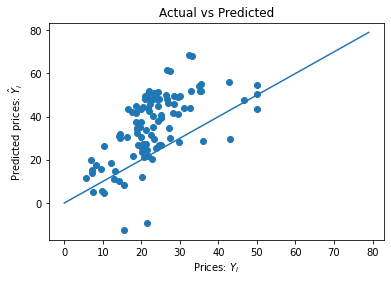

In [ ]:
plt.scatter(y_test, pred)
plt.plot(range(80), range(80))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual vs Predicted")
plt.show()

**Conclusion**

Despite its simplicity, linear regression is one of the most commonly used machine learning algorithms in the industry. Although there are much simpler ways to implement this algorithm like using scikit-learn and even TensorFlow’s LinearRegressor, we implemented the entire algorithm from scratch with the intent of experiencing TensorFlow’s functions.

When you go into neural networks, there are high-level libraries like Keras which simplifies the process of building neural networks using TensorFlow as backend. But eventually, you would want to customize your models however you want it, and this is where the low-level functions of TensorFlow are very useful.
